# San Francisco Crime Incidents Prediction
##  Content 
* Import Data

## Import Data

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/data/sf_03_18.csv")
display(dbutils.fs.ls('dbfs:/data/'))

path,name,size,modificationTime
dbfs:/data/sf_03_18.csv,sf_03_18.csv,550945238,1663872370000


In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import os

In [0]:
data_path = "dbfs:/data/sf_03_18.csv"
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, to_timestamp, hour
spark = SparkSession.builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
 
df = spark.read.format("csv").option("header", "true").load(data_path)
df = df.withColumn('Date', to_date(df.Date, "MM/dd/yyyy"))
display(df)

 

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,2006-07-15,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,2007-09-25,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,2011-09-24,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,2003-12-12,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,2004-12-30,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2018-04-25,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null,86
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,2018-03-24,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null,53
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-03-01,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,null,null,null,5,null,9,1,null,null,5,null,38


## Data Preprocessing

### Remove irrelevant columns and check missing data

In [0]:
df_pd = df.toPandas()
df_pd = df_pd.iloc[:,:14] # removing irrelevent columns depending updates of the crime data 
column_names = df_pd.columns.tolist()
column_names_df = pd.DataFrame(column_names, index = column_names, columns = ['Name'])
total = df_pd.isnull().sum().rename('Total')
percent = (df_pd.isnull().sum()/df_pd.isnull().count()).rename('Percent')
missing_data = pd.concat([column_names_df, total,percent], axis = 1)
display(missing_data)

Name,Total,Percent
PdId,0,0.0
IncidntNum,0,0.0
Incident Code,0,0.0
Category,0,0.0
Descript,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Time,0,0.0
PdDistrict,0,0.0
Resolution,0,0.0


In [0]:
df_pd.head(2)

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
0,3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
1,5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)


### Remove duplicates

In [0]:
df_pd.nunique() 

Out[6]: PdId             2129525
IncidntNum       1703626
Incident Code        885
Category              37
Descript             847
DayOfWeek              7
Date                5613
Time                1439
PdDistrict            11
Resolution            12
Address            25121
X                  60950
Y                  59635
location           61316
dtype: int64

In [0]:
# The number of unique incident is not equal to the total number of incident because some incident cases may include several different kinds of offense. Hence, they are treated as one incident.
df_pd[df_pd.duplicated(['IncidntNum','PdDistrict'], keep = False)].sort_values('IncidntNum')[:3]

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
1773220,6238907043,000062389,07043,VEHICLE THEFT,"VEHICLE, RECOVERED, MOTORCYCLE",Tuesday,2004-03-30,11:35,MISSION,NONE,2600 Block of BRYANT ST,-122.409121399225,37.7519787472165,POINT (-122.40912139922501 37.7519787472165)
925139,6238907023,000062389,07023,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2004-03-30,11:35,MISSION,NONE,2600 Block of BRYANT ST,-122.409121399225,37.7519787472165,POINT (-122.40912139922501 37.7519787472165)
2074468,12343602004,000123436,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Friday,2004-07-02,14:08,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403404791479,37.775420706711,POINT (-122.40340479147902 37.775420706711)


In [0]:
df_pd.drop_duplicates(['IncidntNum','PdDistrict'], inplace=True)
df_pd[:3]

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
0,3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
1,5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)
2,6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,2006-07-15,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123)


### Construct more time features (year, month, hour, and day_of_month columns for time series analysis)

In [0]:
from pyspark.sql.functions import year, month,hour, date_format, to_date
df = df.withColumn('Year',year(df.Date)) # extract year and month from date
df = df.withColumn('Month',month(df.Date))
df = df.withColumn('Hour', hour(df['Time']))
df = df.withColumn('D_O_M', date_format(df['Date'],'d'))
df.createOrReplaceTempView('sf_crime')

## Data Exploration

### The number of crimes for different category

In [0]:
df.createOrReplaceTempView("sf_crime")
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


### Counts the number of crimes for different district

In [0]:
q2_result = df.groupBy('PdDistrict').count().orderBy('count', ascending = False)
display(q2_result)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


### Count the number of crimes each "Sunday" at "SF downtown".

In [0]:
sunday_crime_dt = spark.sql("""SELECT date, count(*) AS Count FROM (SELECT date, DayofWeek AS Sunday FROM sf_crime WHERE DayofWeek = 'Sunday' AND X BETWEEN -122.4313 AND -122.4213 AND Y BETWEEN 37.7540  AND 37.7740) GROUP BY 1 ORDER BY 1""")
display(sunday_crime_dt)

date,Count
2003-01-05,13
2003-01-12,20
2003-01-19,17
2003-01-26,13
2003-02-02,14
2003-02-09,22
2003-02-16,12
2003-02-23,14
2003-03-02,16
2003-03-09,8


### Analysis the number of crime in each month from 2015 to 2018

In [0]:
monthly_crime = spark.sql("""SELECT Year, Month, Count(*) AS Count FROM  (
SELECT
  Year,
  Month
FROM
  sf_crime
WHERE
  Year BETWEEN 2015 And 2019) 
GROUP BY 1 , 2 ORDER BY 1,2""")
display(monthly_crime)

Year,Month,Count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


### Analysis the number of crime with respsect to the hour in certian day

In [0]:

q5_result = spark.sql("""
                      select 
                             Month,
                             D_O_M,
                             Hour,
                             count(*) as Count
                      from sf_crime
                      where Date like '%-12-15' 
                      group by 1,2,3
                      order by 1,2,3
                      """)
display(q5_result)

Month,D_O_M,Hour,Count
12,15,0,312
12,15,1,131
12,15,2,143
12,15,3,71
12,15,4,74
12,15,5,60
12,15,6,78
12,15,7,122
12,15,8,256
12,15,9,257


### Identify top 3 danger districts

In [0]:
top_3 = spark.sql("""SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC LIMIT 3""")
display(top_3)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
%sql
SELECT Category, Hour,COUNT(*) AS Count
FROM sf_crime
WHERE PdDistrict in (SELECT PdDistrict FROM (SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC LIMIT 3))
GROUP BY 1,2
ORDER BY 3 DESC

Category,Hour,Count
LARCENY/THEFT,18,19911
LARCENY/THEFT,19,19444
LARCENY/THEFT,20,16604
LARCENY/THEFT,17,15903
LARCENY/THEFT,21,13833
LARCENY/THEFT,22,13797
LARCENY/THEFT,16,13644
LARCENY/THEFT,23,13152
LARCENY/THEFT,12,13030
LARCENY/THEFT,15,12861


### The percentage of resolution for different category of crime

In [0]:
res_num = spark.sql("""select category, resolution, count(*) as N_res from sf_crime group by category, resolution""")
res_num.createOrReplaceTempView("res_num")

cate_num = spark.sql("""select category, count(*) as N_cate from sf_crime group by category""")
cate_num.createOrReplaceTempView("cate_num")

q7_result = spark.sql("""
                      select distinct sf_crime.category, sf_crime.resolution, N_res/N_cate as Percentage
                      from (sf_crime left join res_num on sf_crime.category = res_num.category and sf_crime.resolution = res_num.resolution)
                      left join cate_num on sf_crime.category = cate_num.category
                      order by category, resolution""")
q7_result.createOrReplaceTempView("q7_result")


In [0]:
display(q7_result)

category,resolution,Percentage
ARSON,"ARREST, BOOKED",0.1625806451612903
ARSON,"ARREST, CITED",0.004387096774193549
ARSON,COMPLAINANT REFUSES TO PROSECUTE,7.741935483870968E-4
ARSON,EXCEPTIONAL CLEARANCE,5.161290322580645E-4
ARSON,NONE,0.8190967741935484
ARSON,NOT PROSECUTED,7.741935483870968E-4
ARSON,PROSECUTED BY OUTSIDE AGENCY,7.741935483870968E-4
ARSON,PROSECUTED FOR LESSER OFFENSE,2.5806451612903227E-4
ARSON,PSYCHOPATHIC CASE,0.004387096774193549
ARSON,UNFOUNDED,0.0064516129032258064


In [0]:
q7 = spark.sql("""
               select Resolution, Percentage
               from q7_result
               where category = 'BURGLARY'
               order by Percentage desc
               """)
display(q7)


Resolution,Percentage
NONE,0.8417209307432989
"ARREST, BOOKED",0.14017152206617106
UNFOUNDED,0.005984604741563903
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.004535122492230995
COMPLAINANT REFUSES TO PROSECUTE,0.0032723159871303545
"ARREST, CITED",0.0016032152151712476
EXCEPTIONAL CLEARANCE,0.0014714441015955286
NOT PROSECUTED,6.039509372220453E-4
PROSECUTED BY OUTSIDE AGENCY,3.513896362019173E-4
LOCATED,1.6471389196964873E-4


In [0]:
q7 = spark.sql("""
               select Resolution, Percentage
               from q7_result
               where category = 'KIDNAPPING'
               order by Percentage desc
               """)
display(q7)



Resolution,Percentage
"ARREST, BOOKED",0.5056048575432041
NONE,0.4187295656235404
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.030126109294722092
COMPLAINANT REFUSES TO PROSECUTE,0.023120037365716956
UNFOUNDED,0.008173750583839328
"ARREST, CITED",0.0039701074264362445
PROSECUTED BY OUTSIDE AGENCY,0.003503035964502569
EXCEPTIONAL CLEARANCE,0.003269500233535731
NOT PROSECUTED,0.0014012143858010276
LOCATED,0.0011676786548341896


### Key Insights
* The top 3 crime activites are LARCENY/THEF, OTHER OFFENSE, and non-criminal.
* The top 3 crime activity districts are Sourthern, MISSSION, and Northern.
* The crime rate from 2015 to 2018 is stable, but it slightly reduced over these four years. 
* During a day, the safest time interval is early morning in SF

### Recommendations

* The the reslove percentage of crime are really low for low damage crime activities, such as theft. The best way to solve this issue is to put more carmera on street which is a low cost methodology to solve this problem. However, it has to be agreed by public considering the privacy.
* The ploice department deploy more force in the sourthen, mission, and northern district from 5:00 pm to 9:00 pm
* Residents and travellers should avoid going out at late night.

## Time Series Analysis

### Visualize crime data montly mean time series

Out[20]: [<matplotlib.lines.Line2D at 0x7f9375ab0fa0>]

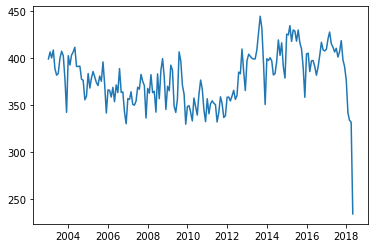

In [0]:
ts = spark.sql('select  date, count(*) as number_of_crime from sf_crime group by 1 order by 1')
y = ts.toPandas()
y.set_index('date', inplace=True)
# set index as DataTimeIndex
y.index = pd.to_datetime(y.index)
# The 'MS' string groups the data into buckets by start of the month
y = y['number_of_crime'].resample('MS').mean()
plt.plot(y)

### Remove outliers

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


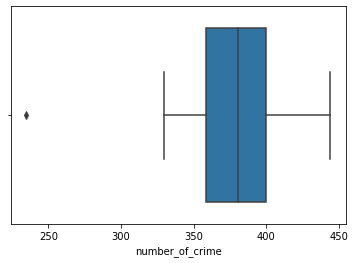

In [0]:
# The crime number in May, 2018 is an outlier in mathmatical persepctive, and further investigation should be done to check this data. remove this data point for know
import seaborn as sns
sns.boxplot(y) 
y = y[:-1]

Out[22]: [<matplotlib.lines.Line2D at 0x7f93744dfc10>]

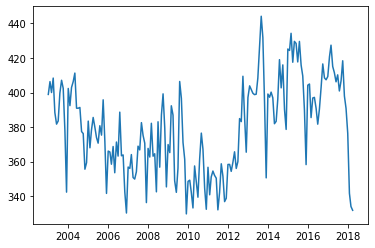

In [0]:
plt.plot(y)

### Time series model training and hyperparameter tuning

In [0]:
import itertools
p = d = q = range(0,2)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

Out[23]: [(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [0]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

optimal = {'param':None, 'param_seasonal':None, 'aic':None}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)

            results = mod.fit()
            if (not optimal['aic']) or results.aic < optimal['aic']:
                optimal['param'] = param
                optimal['param_seasonal'] = param_seasonal
                optimal['aic'] = results.aic
                print('optimal updated')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
              continue
print('optimal paramaters:', optimal)

optimal updated
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2695.9938258162792
optimal updated
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2328.8473708301376
optimal updated
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1598.4425213003374
optimal updated
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1478.7280246729842
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1608.4005104355365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1586.4727169538428
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.1291053679233
optimal updated
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1474.8404729779936
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2449.5952817374755
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2103.7672755829435
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1522.689482852902
optimal updated
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1393.6778242060657
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1540.7852575061968
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1529.0444938735309
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1416.4371628601475
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1395.6274259958982
ARIMA(0, 

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=optimal['param'],
                                seasonal_order=optimal['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3795      0.255      1.489      0.136      -0.120       0.879
ma.L1         -0.6457      0.229     -2.819      0.005      -1.095      -0.197
ma.S.L12      -1.0000   1061.794     -0.001      0.999   -2082.079    2080.079
sigma2       174.8184   1.86e+05      0.001      0.999   -3.64e+05    3.64e+05


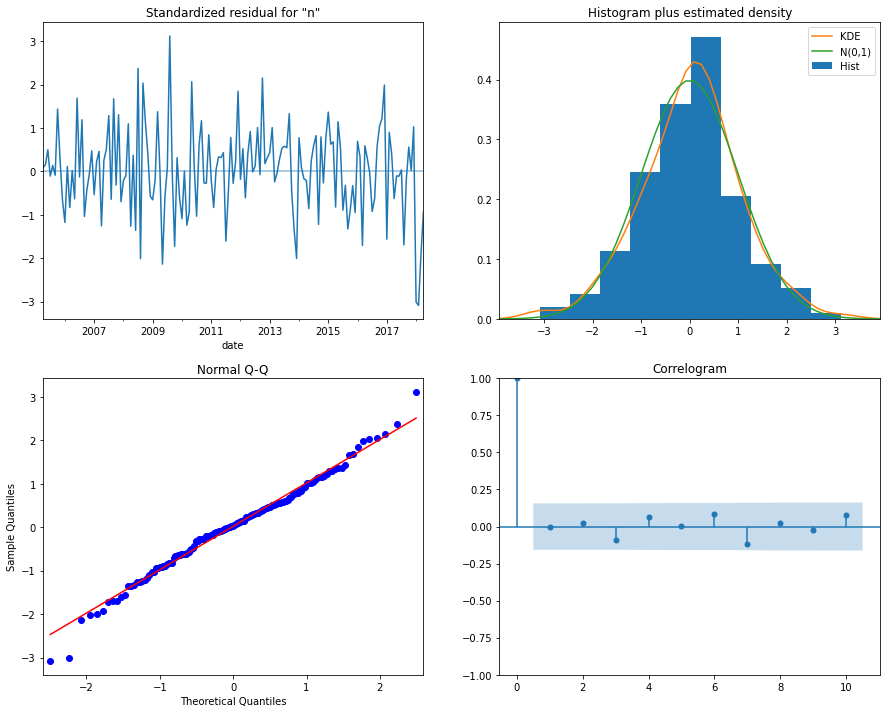

In [0]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Results

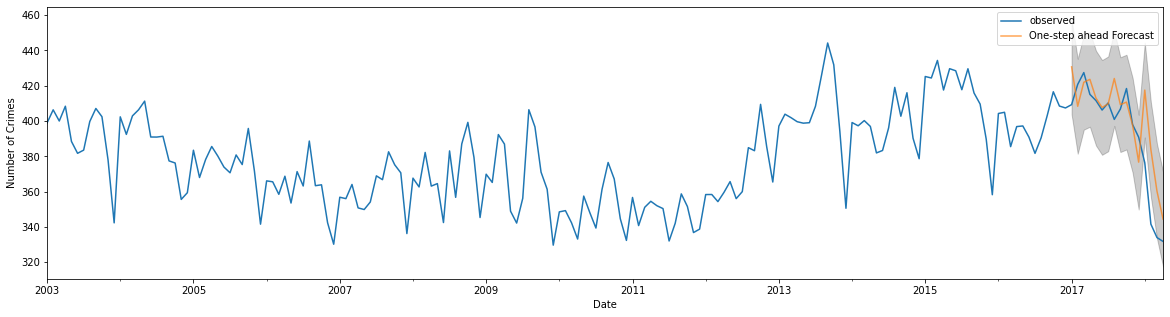

In [0]:
# one step forcase
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()



ax = y.plot(label='observed', figsize=(20,5))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
plt.legend()

plt.show()

In [0]:
y_forecasted 

Out[36]: date
2017-01-01    430.659434
2017-02-01    408.333531
2017-03-01    421.935083
2017-04-01    423.577823
2017-05-01    412.934480
2017-06-01    407.678216
2017-07-01    409.707492
2017-08-01    424.066310
2017-09-01    409.258636
2017-10-01    410.692854
2017-11-01    397.661213
2017-12-01    376.701002
2018-01-01    417.497600
2018-02-01    383.823501
2018-03-01    360.285325
2018-04-01    344.414325
Freq: MS, Name: predicted_mean, dtype: float64

In [0]:
y_truth = y['2017-01-01':]
y_truth

Out[34]: date
2017-01-01    409.258065
2017-02-01    420.714286
2017-03-01    427.419355
2017-04-01    415.066667
2017-05-01    411.548387
2017-06-01    406.200000
2017-07-01    410.225806
2017-08-01    400.903226
2017-09-01    406.800000
2017-10-01    418.387097
2017-11-01    398.000000
2017-12-01    390.806452
2018-01-01    376.354839
2018-02-01    341.607143
2018-03-01    334.000000
2018-04-01    331.800000
Freq: MS, Name: number_of_crime, dtype: float64

In [0]:
import numpy as np

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 19.11


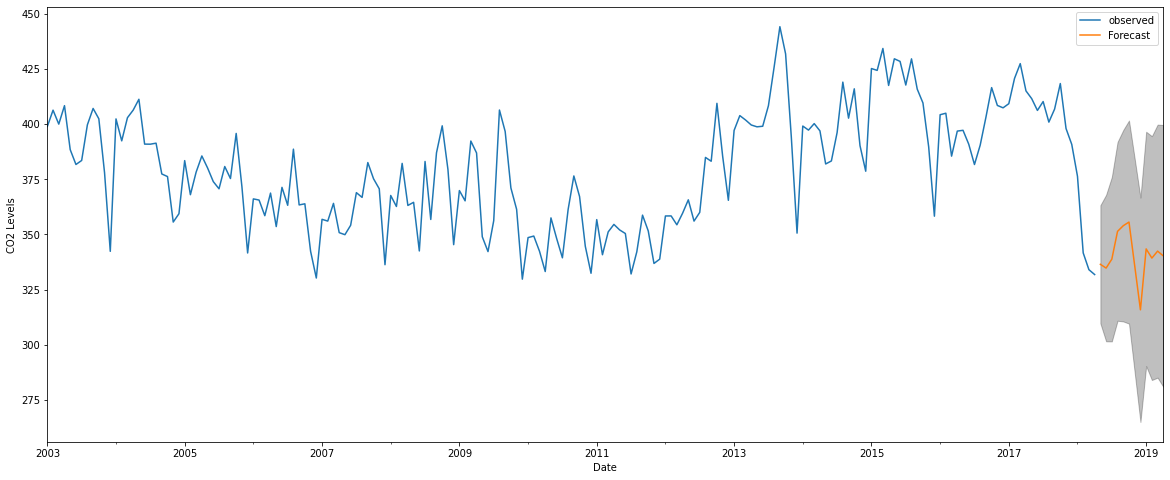

In [0]:
# 12 steps forcast
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()